 la préparation, le nettoyage et l’analyse exploratoire des données.

# <a name="C1">Importation des données</a>

In [490]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.cluster import hierarchy
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

In [491]:
DisponibiliteAlimentaire = pd.read_csv('DisponibiliteAlimentaire_2017.csv')

Population = pd.read_csv('Population_2000_2018.csv')

pib_stab = pd.read_csv('pib_stab_2017.csv')

tendance = pd.read_csv('Tendance_Elevage_2017.csv')

croissance = pd.read_csv('croissance_2017.csv')

In [492]:
DisponibiliteAlimentaire.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [493]:
DisponibiliteAlimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [494]:
DisponibiliteAlimentaire.shape

(176600, 14)

In [495]:
DisponibiliteAlimentaire.columns

Index(['Code Domaine', 'Domaine', 'Code zone', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole'],
      dtype='object')

In [496]:
# vérification du nombre de valeur différente dans chaque colonne
def numberValDataframe(x):
    for i in x:
        print(i)
        print(x[i].nunique())
        
numberValDataframe(DisponibiliteAlimentaire)

Code Domaine
1
Domaine
1
Code zone
174
Zone
174
Code Élément
17
Élément
17
Code Produit
98
Produit
98
Code année
1
Année
1
Unité
4
Valeur
7250
Symbole
2
Description du Symbole
2


In [497]:
DisponibiliteAlimentaire.drop(['Code Domaine', 'Domaine', 'Code zone', 'Code Élément','Code Produit','Code année','Unité','Description du Symbole','Symbole'], axis = 1, inplace=True)

In [498]:
# vérification des valeurs manquantes
print(DisponibiliteAlimentaire.isnull().sum())

Zone       0
Élément    0
Produit    0
Année      0
Valeur     0
dtype: int64


In [499]:
# Nom des produits
produit_list = DisponibiliteAlimentaire['Produit'].values
produit_list

array(['Blé et produits', 'Blé et produits', 'Blé et produits', ...,
       'Miscellanees', 'Miscellanees', 'Miscellanees'], dtype=object)

In [500]:
# Nouveau dataframe avec que les produits viandes de volailles.
df_volailles = DisponibiliteAlimentaire.loc[(DisponibiliteAlimentaire['Produit'] == 'Viande de Volailles')]
df_volailles

,Zone,Élément,Produit,Année,Valeur
651,Afghanistan,Production,Viande de Volailles,2017,28.00
652,Afghanistan,Importations - Quantité,Viande de Volailles,2017,29.00
653,Afghanistan,Variation de stock,Viande de Volailles,2017,0.00
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,2017,57.00
655,Afghanistan,Pertes,Viande de Volailles,2017,2.00
...,...,...,...,...,...
176396,Zimbabwe,Nourriture,Viande de Volailles,2017,67.00
176397,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,2017,4.68
176398,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Viande de Volailles,2017,16.00
176399,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,Viande de Volailles,2017,1.59


In [501]:
VALID_COUNTRIES = df_volailles["Zone"].values
mask = ~df_volailles['Zone'].isin(df_volailles["Zone"].values)
print(mask.groupby(mask).value_counts())
df_volailles.loc[mask, 'Zone'] = np.NaN

Zone   Zone 
False  False    2061
Name: Zone, dtype: int64


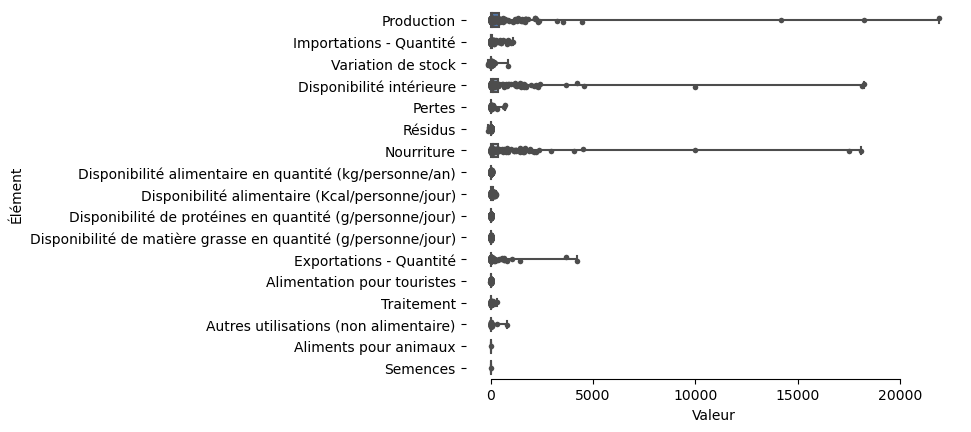

In [502]:
sns.boxplot(df_volailles, x="Valeur", y="Élément",
    whis=[0, 100], width=.6, palette="vlag")

sns.stripplot(df_volailles, x="Valeur", y="Élément", size=4, color=".3")

sns.despine(trim=True, left=True)

In [503]:
# filtre des valeurs considérées abérentes 'outliers' on constate qu'il y a 3 pays qui sortent du lot, (Brésil, chine et etat unis)
# il est peu etre bon de les supprimer afin de ne pas fausser l'ensemble des pays avant analyse.
df_volailles.loc[df_volailles['Valeur'] >= 10000]

,Zone,Élément,Produit,Année,Valeur
25062,Brésil,Production,Viande de Volailles,2017,14201.0
35872,"Chine, continentale",Production,Viande de Volailles,2017,18236.0
35876,"Chine, continentale",Disponibilité intérieure,Viande de Volailles,2017,18161.0
35881,"Chine, continentale",Nourriture,Viande de Volailles,2017,17518.0
56144,États-Unis d'Amérique,Production,Viande de Volailles,2017,21914.0
56148,États-Unis d'Amérique,Disponibilité intérieure,Viande de Volailles,2017,18266.0
56152,États-Unis d'Amérique,Nourriture,Viande de Volailles,2017,18100.0


In [504]:
# supprimer la colonne produit
df_volailles.drop(columns=['Produit'], inplace=True)

C:\Users\micka\AppData\Local\Temp\ipykernel_14156\3643778736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_volailles.drop(columns=['Produit'], inplace=True)


In [505]:
Population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [506]:
Population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [507]:
Population = Population.loc[Population['Année'] == 2017]
Population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
17,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres,NaN
36,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,57009.756,X,Sources internationales sûres,NaN
55,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,2884.169,X,Sources internationales sûres,NaN
74,OA,Séries temporelles annuelles,4,Algérie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,41389.189,X,Sources internationales sûres,NaN
93,OA,Séries temporelles annuelles,79,Allemagne,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,82658.409,X,Sources internationales sûres,NaN


In [508]:
Population['Valeur'] = Population['Valeur'] * 1000

In [509]:
# vérification du nombre de valeur différente dans chaque colonne
for i in Population:
    print(i)
    print(Population[i].nunique())

Code Domaine
1
Domaine
1
Code zone
236
Zone
236
Code Élément
1
Élément
1
Code Produit
1
Produit
1
Code année
1
Année
1
Unité
1
Valeur
236
Symbole
2
Description du Symbole
2
Note
1


In [510]:
# On retire les colonnes qui non pas d'interet (une seule valeur ou information)
Population.drop(['Code Domaine', 'Domaine', 'Code zone', 'Code Élément','Élément','Code Produit', 'Produit','Code année','Unité','Symbole','Description du Symbole','Note'], axis = 1, inplace=True)

<Axes: xlabel='Valeur'>

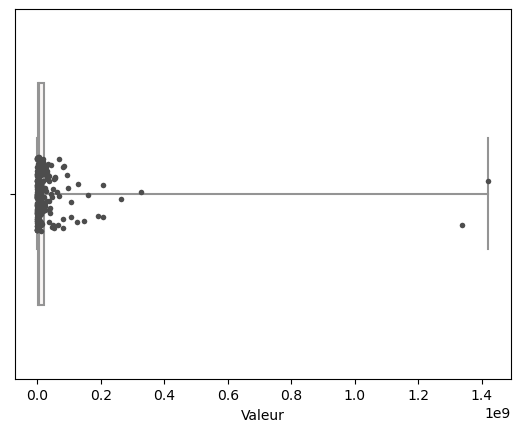

In [511]:
# boite à moustache qui nous présente visuellement les outliers
sns.boxplot(Population, x="Valeur",
    whis=[0, 100], width=.6, palette="vlag")

sns.stripplot(Population, x="Valeur", size=4, color=".3")

In [512]:
Population.loc[Population['Valeur'] >= 1000000]

,Zone,Année,Valeur
17,Afghanistan,2017,36296113.0
36,Afrique du Sud,2017,57009756.0
55,Albanie,2017,2884169.0
74,Algérie,2017,41389189.0
93,Allemagne,2017,82658409.0
...,...,...,...
4333,Venezuela (République bolivarienne du),2017,29402484.0
4352,Viet Nam,2017,94600648.0
4371,Yémen,2017,27834819.0
4390,Zambie,2017,16853599.0


In [513]:
Population.rename(columns = {'Valeur':'Population'}, inplace=True)

In [514]:
pib_stab.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,55088.60,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.92,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,4,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,2096.10,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,13950.50,X,Ciffre de sources internationales,NaN


In [515]:
numberValDataframe(pib_stab)

Code Domaine
1
Domaine
1
Code zone (M49)
198
Zone
198
Code Élément
2
Élément
1
Code Produit
2
Produit
2
Code année
1
Année
1
Unité
2
Valeur
333
Symbole
1
Description du Symbole
1
Note
0


In [516]:
pib_stab.columns

Index(['Code Domaine', 'Domaine', 'Code zone (M49)', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole', 'Note'],
      dtype='object')

In [517]:
# On retire les colonnes qui non pas d'interet (une seule valeur ou information)
pib_stab.drop(['Code Domaine', 'Domaine', 'Code zone (M49)','Code Élément',
       'Élément', 'Code Produit', 'Code année','Symbole', 'Description du Symbole', 'Note','Unité'], axis = 1, inplace=True)

In [518]:
# on supprimer les colonnes non utile
croissance.drop(['Domaine', 'Produit','Unité'], axis = 1, inplace=True)

In [519]:
# renommer la colonne pour la concaténer ensuite
croissance.rename(columns = {'Élément':'Produit'}, inplace=True)

In [520]:
# on concat pour préparer le futur pivot
pib_croissance = pd.concat([pib_stab,croissance])
pib_croissance

,Zone,Produit,Année,Valeur
0,Pays-Bas (Royaume des),"PIB par habitant, ($ PPA internationaux consta...",2017,55088.600000
1,Pays-Bas (Royaume des),Stabilité politique et absence de violence/ter...,2017,0.920000
2,Afghanistan,"PIB par habitant, ($ PPA internationaux consta...",2017,2096.100000
3,Afghanistan,Stabilité politique et absence de violence/ter...,2017,-2.800000
4,Afrique du Sud,"PIB par habitant, ($ PPA internationaux consta...",2017,13950.500000
...,...,...,...,...
205,Venezuela (République bolivarienne du),Croissance annuelle US$,2017,4.921964
206,Viet Nam,Croissance annuelle US$,2017,11.818062
207,Yémen,Croissance annuelle US$,2017,-1.197038
208,Zambie,Croissance annuelle US$,2017,31.546963


In [521]:
pib_croissance = pib_croissance.replace(['Pays-Bas (Royaume des)'], 'Pays-Bas')

In [522]:
pib_croissance

,Zone,Produit,Année,Valeur
0,Pays-Bas,"PIB par habitant, ($ PPA internationaux consta...",2017,55088.600000
1,Pays-Bas,Stabilité politique et absence de violence/ter...,2017,0.920000
2,Afghanistan,"PIB par habitant, ($ PPA internationaux consta...",2017,2096.100000
3,Afghanistan,Stabilité politique et absence de violence/ter...,2017,-2.800000
4,Afrique du Sud,"PIB par habitant, ($ PPA internationaux consta...",2017,13950.500000
...,...,...,...,...
205,Venezuela (République bolivarienne du),Croissance annuelle US$,2017,4.921964
206,Viet Nam,Croissance annuelle US$,2017,11.818062
207,Yémen,Croissance annuelle US$,2017,-1.197038
208,Zambie,Croissance annuelle US$,2017,31.546963


In [523]:
numberValDataframe(pib_croissance)

Zone
212
Produit
3
Année
1
Valeur
543


In [524]:
tendance['Élément'] = tendance['Élément'] + tendance['Unité']

In [525]:
numberValDataframe(tendance)

Code Domaine
1
Domaine
1
Code zone (M49)
196
Zone
196
Code Élément
3
Élément
3
Code Produit (CPC)
1
Produit
1
Code année
1
Année
1
Unité
3
Valeur
437
Symbole
1
Description du Symbole
1


In [526]:
tendance.columns

Index(['Code Domaine', 'Domaine', 'Code zone (M49)', 'Zone', 'Code Élément',
       'Élément', 'Code Produit (CPC)', 'Produit', 'Code année', 'Année',
       'Unité', 'Valeur', 'Symbole', 'Description du Symbole'],
      dtype='object')

In [527]:
tendance.drop(['Code Domaine', 'Domaine','Code zone (M49)', 'Code Élément', 'Unité', 'Code Produit (CPC)', 'Produit', 'Code année', 'Symbole', 'Description du Symbole'  ], axis=1, inplace=True)

In [528]:
tendance.rename(columns = {'Élément':'Produit'},inplace=True)

In [529]:
tendance.loc[tendance['Zone'] == 'Pays-Bas (Royaume des)']

,Zone,Produit,Année,Valeur
407,Pays-Bas (Royaume des),Densité des animaux dans la superficie agricol...,2017,0.58
408,Pays-Bas (Royaume des),Part du total des animaux% du total des UGB,2017,13.20
409,Pays-Bas (Royaume des),RéservesUnités de gros bétail (UGB),2017,1051844.00


In [530]:
tendance = tendance.replace(['Pays-Bas (Royaume des)'], 'Pays-Bas')

In [531]:
pib_croissance

,Zone,Produit,Année,Valeur
0,Pays-Bas,"PIB par habitant, ($ PPA internationaux consta...",2017,55088.600000
1,Pays-Bas,Stabilité politique et absence de violence/ter...,2017,0.920000
2,Afghanistan,"PIB par habitant, ($ PPA internationaux consta...",2017,2096.100000
3,Afghanistan,Stabilité politique et absence de violence/ter...,2017,-2.800000
4,Afrique du Sud,"PIB par habitant, ($ PPA internationaux consta...",2017,13950.500000
...,...,...,...,...
205,Venezuela (République bolivarienne du),Croissance annuelle US$,2017,4.921964
206,Viet Nam,Croissance annuelle US$,2017,11.818062
207,Yémen,Croissance annuelle US$,2017,-1.197038
208,Zambie,Croissance annuelle US$,2017,31.546963


In [532]:
pib_croissance_tendance = pd.concat([pib_croissance,tendance])
pib_croissance_tendance

,Zone,Produit,Année,Valeur
0,Pays-Bas,"PIB par habitant, ($ PPA internationaux consta...",2017,55088.60
1,Pays-Bas,Stabilité politique et absence de violence/ter...,2017,0.92
2,Afghanistan,"PIB par habitant, ($ PPA internationaux consta...",2017,2096.10
3,Afghanistan,Stabilité politique et absence de violence/ter...,2017,-2.80
4,Afrique du Sud,"PIB par habitant, ($ PPA internationaux consta...",2017,13950.50
...,...,...,...,...
582,Zambie,Part du total des animaux% du total des UGB,2017,13.77
583,Zambie,RéservesUnités de gros bétail (UGB),2017,391467.94
584,Zimbabwe,Densité des animaux dans la superficie agricol...,2017,0.01
585,Zimbabwe,Part du total des animaux% du total des UGB,2017,4.38


In [533]:
# vérification des valeurs manquantes
print(pib_croissance_tendance.isnull().sum())

Zone       0
Produit    0
Année      0
Valeur     0
dtype: int64


In [534]:
# renommer la colonne element en produit
df_volailles.rename(columns = {'Élément': 'Produit'}, inplace=True)

C:\Users\micka\AppData\Local\Temp\ipykernel_14156\2823670751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_volailles.rename(columns = {'Élément': 'Produit'}, inplace=True)


In [535]:
# faire la concatenation 
df_final = pd.concat([df_volailles,pib_croissance_tendance])

In [536]:
df_final

,Zone,Produit,Année,Valeur
651,Afghanistan,Production,2017,28.00
652,Afghanistan,Importations - Quantité,2017,29.00
653,Afghanistan,Variation de stock,2017,0.00
654,Afghanistan,Disponibilité intérieure,2017,57.00
655,Afghanistan,Pertes,2017,2.00
...,...,...,...,...
582,Zambie,Part du total des animaux% du total des UGB,2017,13.77
583,Zambie,RéservesUnités de gros bétail (UGB),2017,391467.94
584,Zimbabwe,Densité des animaux dans la superficie agricol...,2017,0.01
585,Zimbabwe,Part du total des animaux% du total des UGB,2017,4.38


In [537]:
mask = ~df_final['Zone'].isin(VALID_COUNTRIES)
df_final.loc[mask, 'Zone'] = np.NaN

In [538]:
numberValDataframe(df_final)

Zone
172
Produit
23
Année
1
Valeur
1712


In [539]:
print(df_final.isnull().sum())

Zone       169
Produit      0
Année        0
Valeur       0
dtype: int64


In [540]:
# suppression des valeurs manquantes
df_final.dropna(subset=['Zone'], inplace=True)

In [541]:
df_final = df_final.pivot(index=['Zone','Année'], columns=['Produit'], values=['Valeur'])

In [542]:
df_final.reset_index(inplace=True)

In [543]:
df_final.columns

MultiIndex([(  'Zone', ...),
            ( 'Année', ...),
            ('Valeur', ...),
            ('Valeur', ...),
            ('Valeur', ...),
            ('Valeur', ...),
            ('Valeur', ...),
            ('Valeur', ...),
            ('Valeur', ...),
            ('Valeur', ...),
            ('Valeur', ...),
            ('Valeur', ...),
            ('Valeur', ...),
            ('Valeur', ...),
            ('Valeur', ...),
            ('Valeur', ...),
            ('Valeur', ...),
            ('Valeur', ...),
            ('Valeur', ...),
            ('Valeur', ...),
            ('Valeur', ...),
            ('Valeur', ...),
            ('Valeur', ...),
            ('Valeur', ...),
            ('Valeur', ...)],
           names=[None, 'Produit'])

In [544]:
# faire la jointure sur l'année et la zone 
# avec le fichie population et le df final
df_final = pd.merge(df_final, Population, on=['Zone','Année'])

C:\Users\micka\AppData\Local\Temp\ipykernel_14156\2563370303.py:3: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  df_final = pd.merge(df_final, Population, on=['Zone','Année'])


In [545]:
print(df_final.isnull().sum())

Zone                                                                          0
Année                                                                         0
(Zone, )                                                                      0
(Année, )                                                                     0
(Valeur, Alimentation pour touristes)                                        94
(Valeur, Aliments pour animaux)                                             171
(Valeur, Autres utilisations (non alimentaire))                             138
(Valeur, Croissance annuelle US$)                                             2
(Valeur, Densité des animaux dans la superficie agricoleUGB/ha)               3
(Valeur, Disponibilité alimentaire (Kcal/personne/jour))                      0
(Valeur, Disponibilité alimentaire en quantité (kg/personne/an))              0
(Valeur, Disponibilité de matière grasse en quantité (g/personne/jour))       0
(Valeur, Disponibilité de protéines en q

In [546]:
df_final.drop(df_final.columns[[2, 3, 4, 5, 6 , 19, 22, 23, 25, 26]], axis=1, inplace=True)

In [547]:
df_final

,Zone,Année,"(Valeur, Croissance annuelle US$)","(Valeur, Densité des animaux dans la superficie agricoleUGB/ha)","(Valeur, Disponibilité alimentaire (Kcal/personne/jour))","(Valeur, Disponibilité alimentaire en quantité (kg/personne/an))","(Valeur, Disponibilité de matière grasse en quantité (g/personne/jour))","(Valeur, Disponibilité de protéines en quantité (g/personne/jour))","(Valeur, Disponibilité intérieure)","(Valeur, Exportations - Quantité)","(Valeur, Importations - Quantité)","(Valeur, Nourriture)","(Valeur, PIB par habitant, ($ PPA internationaux constants de 2017))","(Valeur, Part du total des animaux% du total des UGB)","(Valeur, Production)","(Valeur, RéservesUnités de gros bétail (UGB))","(Valeur, Stabilité politique et absence de violence/terrorisme (indice))",Population
0,Afghanistan,2017,12.593362,0.00,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2096.1,2.04,28.0,135730.00,-2.80,36296113.0
1,Afrique du Sud,2017,10.667160,0.02,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,13950.5,11.81,1667.0,1670334.59,-0.28,57009756.0
2,Albanie,2017,10.705471,0.07,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,12771.0,10.54,13.0,78350.00,0.38,2884169.0
3,Algérie,2017,0.629575,0.03,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,11809.5,21.13,275.0,1348267.71,-0.92,41389189.0
4,Allemagne,2017,7.456452,0.10,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,53071.5,7.99,1514.0,1600000.00,0.59,82658409.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,2017,-16.186703,0.62,147.0,43.47,9.25,14.80,412.0,94.0,433.0,412.0,71182.4,21.60,48.0,238412.57,0.62,9487203.0
168,Équateur,2017,5.643634,0.29,83.0,19.31,6.35,6.15,341.0,0.0,0.0,324.0,11679.4,31.67,340.0,1605560.00,-0.07,16785361.0
169,États-Unis d'Amérique,2017,5.592136,0.04,219.0,55.68,14.83,19.93,18266.0,3692.0,123.0,18100.0,59914.8,10.92,21914.0,14860000.00,0.29,325084756.0
170,Éthiopie,2017,12.413311,0.01,0.0,0.13,0.03,0.04,14.0,NaN,1.0,14.0,1988.0,1.33,14.0,560560.00,-1.68,106399924.0


In [548]:
df_final.columns.values

array(['Zone', 'Année', ('Valeur', 'Croissance annuelle US$'),
       ('Valeur', 'Densité des animaux dans la superficie agricoleUGB/ha'),
       ('Valeur', 'Disponibilité alimentaire (Kcal/personne/jour)'),
       ('Valeur', 'Disponibilité alimentaire en quantité (kg/personne/an)'),
       ('Valeur', 'Disponibilité de matière grasse en quantité (g/personne/jour)'),
       ('Valeur', 'Disponibilité de protéines en quantité (g/personne/jour)'),
       ('Valeur', 'Disponibilité intérieure'),
       ('Valeur', 'Exportations - Quantité'),
       ('Valeur', 'Importations - Quantité'), ('Valeur', 'Nourriture'),
       ('Valeur', 'PIB par habitant, ($ PPA internationaux constants de 2017)'),
       ('Valeur', 'Part du total des animaux% du total des UGB'),
       ('Valeur', 'Production'),
       ('Valeur', 'RéservesUnités de gros bétail (UGB)'),
       ('Valeur', 'Stabilité politique et absence de violence/terrorisme (indice)'),
       'Population'], dtype=object)

In [549]:
print(df_final.isnull().sum())

# UGB = unité de gros betail

Zone                                                                         0
Année                                                                        0
(Valeur, Croissance annuelle US$)                                            2
(Valeur, Densité des animaux dans la superficie agricoleUGB/ha)              3
(Valeur, Disponibilité alimentaire (Kcal/personne/jour))                     0
(Valeur, Disponibilité alimentaire en quantité (kg/personne/an))             0
(Valeur, Disponibilité de matière grasse en quantité (g/personne/jour))      0
(Valeur, Disponibilité de protéines en quantité (g/personne/jour))           0
(Valeur, Disponibilité intérieure)                                           2
(Valeur, Exportations - Quantité)                                           37
(Valeur, Importations - Quantité)                                            2
(Valeur, Nourriture)                                                         2
(Valeur, PIB par habitant, ($ PPA internationaux con

In [550]:
new_columns = ['Zone', 'Année', 'Croissance annuelle US$ (%)',
       'Densité des animaux dans la superficie agricoleUGB/ha',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure','Exportation - Quantité',
       'Importations - Quantité', 'Nourriture',
       'PIB par habitant  ($)',
       'Part du total des animaux% du total des UGB',
       'Production',
       'RéservesUnités de gros bétail (UGB)',
       'Indice Stabilité politique',
      'Population']

In [551]:
# Renommer l'ensemble des colonnes
df_final.columns = new_columns

In [552]:
test = df_final["Zone"].duplicated()
for i in test:
    if i == True:
        print(i)

In [553]:
df_final

,Zone,Année,Croissance annuelle US$ (%),Densité des animaux dans la superficie agricoleUGB/ha,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportation - Quantité,Importations - Quantité,Nourriture,PIB par habitant ($),Part du total des animaux% du total des UGB,Production,RéservesUnités de gros bétail (UGB),Indice Stabilité politique,Population
0,Afghanistan,2017,12.593362,0.00,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2096.1,2.04,28.0,135730.00,-2.80,36296113.0
1,Afrique du Sud,2017,10.667160,0.02,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,13950.5,11.81,1667.0,1670334.59,-0.28,57009756.0
2,Albanie,2017,10.705471,0.07,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,12771.0,10.54,13.0,78350.00,0.38,2884169.0
3,Algérie,2017,0.629575,0.03,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,11809.5,21.13,275.0,1348267.71,-0.92,41389189.0
4,Allemagne,2017,7.456452,0.10,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,53071.5,7.99,1514.0,1600000.00,0.59,82658409.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,2017,-16.186703,0.62,147.0,43.47,9.25,14.80,412.0,94.0,433.0,412.0,71182.4,21.60,48.0,238412.57,0.62,9487203.0
168,Équateur,2017,5.643634,0.29,83.0,19.31,6.35,6.15,341.0,0.0,0.0,324.0,11679.4,31.67,340.0,1605560.00,-0.07,16785361.0
169,États-Unis d'Amérique,2017,5.592136,0.04,219.0,55.68,14.83,19.93,18266.0,3692.0,123.0,18100.0,59914.8,10.92,21914.0,14860000.00,0.29,325084756.0
170,Éthiopie,2017,12.413311,0.01,0.0,0.13,0.03,0.04,14.0,NaN,1.0,14.0,1988.0,1.33,14.0,560560.00,-1.68,106399924.0


In [554]:
DisponibiliteAlimentaire.loc[DisponibiliteAlimentaire['Année'] == 2017]

,Zone,Élément,Produit,Année,Valeur
0,Afghanistan,Production,Blé et produits,2017,4281.00
1,Afghanistan,Importations - Quantité,Blé et produits,2017,2302.00
2,Afghanistan,Variation de stock,Blé et produits,2017,-119.00
3,Afghanistan,Exportations - Quantité,Blé et produits,2017,0.00
4,Afghanistan,Disponibilité intérieure,Blé et produits,2017,6701.00
...,...,...,...,...,...
176595,Zimbabwe,Nourriture,Miscellanees,2017,19.00
176596,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,Miscellanees,2017,1.33
176597,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Miscellanees,2017,1.00
176598,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,Miscellanees,2017,0.04


In [555]:
df_final.isnull().sum()

Zone                                                              0
Année                                                             0
Croissance annuelle US$ (%)                                       2
Densité des animaux dans la superficie agricoleUGB/ha             3
Disponibilité alimentaire (Kcal/personne/jour)                    0
Disponibilité alimentaire en quantité (kg/personne/an)            0
Disponibilité de matière grasse en quantité (g/personne/jour)     0
Disponibilité de protéines en quantité (g/personne/jour)          0
Disponibilité intérieure                                          2
Exportation - Quantité                                           37
Importations - Quantité                                           2
Nourriture                                                        2
PIB par habitant  ($)                                             7
Part du total des animaux% du total des UGB                       2
Production                                      

In [556]:
df_final.index[df_final.isnull().any(axis=1)]

Int64Index([  0,  13,  14,  23,  26,  27,  32,  33,  34,  40,  43,  54,  56,
             59,  60,  63,  80,  89,  91,  92,  93,  97,  99, 101, 108, 110,
            113, 120, 126, 130, 131, 132, 134, 135, 137, 142, 148, 152, 156,
            160, 161, 163, 165, 170],
           dtype='int64')

In [557]:
df_final.columns[df_final.isnull().any()]

Index(['Croissance annuelle US$ (%)',
       'Densité des animaux dans la superficie agricoleUGB/ha',
       'Disponibilité intérieure', 'Exportation - Quantité',
       'Importations - Quantité', 'Nourriture', 'PIB par habitant  ($)',
       'Part du total des animaux% du total des UGB', 'Production',
       'RéservesUnités de gros bétail (UGB)', 'Indice Stabilité politique'],
      dtype='object')

In [558]:
def filterNanValue(df, columns):
    print(columns)
    print(df[df[columns].isnull()].index.tolist())

In [559]:
# affiche l'index de l'ensemble des valeurs NAN
for column in df_final:
    filterNanValue(df_final,column)

Zone
[]
Année
[]
Croissance annuelle US$ (%)
[33, 131]
Densité des animaux dans la superficie agricoleUGB/ha
[32, 43, 92]
Disponibilité alimentaire (Kcal/personne/jour)
[]
Disponibilité alimentaire en quantité (kg/personne/an)
[]
Disponibilité de matière grasse en quantité (g/personne/jour)
[]
Disponibilité de protéines en quantité (g/personne/jour)
[]
Disponibilité intérieure
[113, 130]
Exportation - Quantité
[0, 13, 14, 23, 26, 27, 40, 43, 54, 56, 59, 60, 63, 80, 89, 91, 92, 93, 97, 99, 101, 108, 110, 113, 126, 130, 132, 134, 135, 137, 142, 148, 152, 156, 160, 165, 170]
Importations - Quantité
[113, 130]
Nourriture
[113, 130]
PIB par habitant  ($)
[33, 40, 108, 120, 131, 161, 163]
Part du total des animaux% du total des UGB
[43, 92]
Production
[43, 92, 113, 130]
RéservesUnités de gros bétail (UGB)
[43, 92]
Indice Stabilité politique
[33, 34, 108, 120]
Population
[]


In [560]:
# Pour éviter d'avoir des valeurs manquantes on retient que nous avons remplacer les valeurs manquantes par 0 pour faciliter l'algoritme
df_final.iloc[[32, 43, 92],:]

,Zone,Année,Croissance annuelle US$ (%),Densité des animaux dans la superficie agricoleUGB/ha,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportation - Quantité,Importations - Quantité,Nourriture,PIB par habitant ($),Part du total des animaux% du total des UGB,Production,RéservesUnités de gros bétail (UGB),Indice Stabilité politique,Population
32,Chine - RAS de Macao,2017,1.241130,NaN,142.0,34.47,10.08,11.90,19.0,0.0,23.0,21.0,122978.0,100.0,3.0,7670.77,1.43,622585.0
43,Djibouti,2017,0.233676,NaN,9.0,2.68,0.59,0.92,3.0,NaN,3.0,3.0,4451.7,NaN,NaN,NaN,-0.74,944099.0
92,Maldives,2017,11.074523,NaN,47.0,13.50,2.94,4.70,12.0,NaN,12.0,7.0,18973.6,NaN,NaN,NaN,0.23,496402.0


In [561]:
# Je cible l'index des deux pays auquel il manque des donneés d'alimentations.
df_final.iloc[[113, 130],:]

,Zone,Année,Croissance annuelle US$ (%),Densité des animaux dans la superficie agricoleUGB/ha,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportation - Quantité,Importations - Quantité,Nourriture,PIB par habitant ($),Part du total des animaux% du total des UGB,Production,RéservesUnités de gros bétail (UGB),Indice Stabilité politique,Population
113,Ouzbékistan,2017,-19.043471,0.02,6.0,1.96,0.40,0.63,NaN,NaN,NaN,NaN,6840.7,6.01,NaN,630000.0,-0.24,31959785.0
130,République démocratique populaire lao,2017,22.136176,0.16,41.0,10.91,2.81,3.59,NaN,NaN,NaN,NaN,7211.3,10.44,NaN,369600.0,0.40,6953035.0


In [562]:
# on filtre sur les index dans valeurs manquantes de la croissance annuelle 
df_final.iloc[[33, 131],:]

,Zone,Année,Croissance annuelle US$ (%),Densité des animaux dans la superficie agricoleUGB/ha,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportation - Quantité,Importations - Quantité,Nourriture,PIB par habitant ($),Part du total des animaux% du total des UGB,Production,RéservesUnités de gros bétail (UGB),Indice Stabilité politique,Population
33,"Chine, Taiwan Province de",2017,NaN,1.19,126.0,33.17,8.70,11.01,785.0,8.0,161.0,785.0,NaN,39.15,652.0,946470.0,NaN,23674546.0
131,République populaire démocratique de Corée,2017,NaN,0.06,8.0,1.62,0.63,0.49,43.0,0.0,0.0,41.0,NaN,9.65,43.0,153930.0,-0.5,25429825.0


In [563]:
# on filtre sur les index dans valeurs manquantes de le pib manquant
df_final.iloc[[33, 40, 108, 120, 131, 161, 163],:]

,Zone,Année,Croissance annuelle US$ (%),Densité des animaux dans la superficie agricoleUGB/ha,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportation - Quantité,Importations - Quantité,Nourriture,PIB par habitant ($),Part du total des animaux% du total des UGB,Production,RéservesUnités de gros bétail (UGB),Indice Stabilité politique,Population
33,"Chine, Taiwan Province de",2017,NaN,1.19,126.0,33.17,8.70,11.01,785.0,8.0,161.0,785.0,NaN,39.15,652.0,946470.00,NaN,23674546.0
40,Cuba,2017,18.792696,0.04,82.0,23.72,5.70,7.12,342.0,NaN,312.0,269.0,NaN,6.64,29.0,256350.00,0.65,11339254.0
108,Nouvelle-Calédonie,2017,0.025797,0.03,136.0,38.71,8.42,14.05,11.0,NaN,9.0,11.0,NaN,7.78,1.0,5469.63,NaN,277150.0
120,Polynésie française,2017,9.229871,0.07,167.0,47.40,10.86,16.20,15.0,0.0,15.0,13.0,NaN,19.22,1.0,3210.66,NaN,276102.0
131,République populaire démocratique de Corée,2017,NaN,0.06,8.0,1.62,0.63,0.49,43.0,0.0,0.0,41.0,NaN,9.65,43.0,153930.00,-0.50,25429825.0
161,Venezuela (République bolivarienne du),2017,4.921964,0.06,71.0,20.28,4.39,7.23,626.0,0.0,25.0,596.0,NaN,8.98,600.0,1269603.52,-1.27,29402484.0
163,Yémen,2017,-1.197038,0.03,30.0,8.53,1.85,3.04,246.0,0.0,78.0,237.0,NaN,15.02,168.0,650000.00,-2.94,27834819.0


In [564]:
# on filtre sur les index dans valeurs manquantes de l'instabilité politique
df_final.iloc[[33, 34, 108, 117, 120],:]

,Zone,Année,Croissance annuelle US$ (%),Densité des animaux dans la superficie agricoleUGB/ha,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportation - Quantité,Importations - Quantité,Nourriture,PIB par habitant ($),Part du total des animaux% du total des UGB,Production,RéservesUnités de gros bétail (UGB),Indice Stabilité politique,Population
33,"Chine, Taiwan Province de",2017,NaN,1.19,126.0,33.17,8.70,11.01,785.0,8.0,161.0,785.0,NaN,39.15,652.0,946470.00,NaN,2.367455e+07
34,"Chine, continentale",2017,10.403498,0.10,59.0,12.33,4.67,3.96,18161.0,576.0,452.0,17518.0,14243.5,19.81,18236.0,50329446.63,NaN,1.421022e+09
108,Nouvelle-Calédonie,2017,0.025797,0.03,136.0,38.71,8.42,14.05,11.0,NaN,9.0,11.0,NaN,7.78,1.0,5469.63,NaN,2.771500e+05
117,Pays-Bas,2017,7.084572,0.58,70.0,20.33,3.74,8.48,372.0,1418.0,608.0,346.0,55088.6,13.20,1100.0,1051844.00,0.92,1.702135e+07
120,Polynésie française,2017,9.229871,0.07,167.0,47.40,10.86,16.20,15.0,0.0,15.0,13.0,NaN,19.22,1.0,3210.66,NaN,2.761020e+05


In [565]:
# je fais le choix de supprimer les deux pays ajoutés du fichier PIB par manque de donnée alimentaire les concernants.
# je fais le choix de supprimer la zone de chine de Taiwan et la Corée, 
# nous savons que le contexte dans ce pays nous permet pas d'exporter nos poulets
df_final.drop([33, 113, 130, 131], inplace = True)

df_final.drop([40, 108, 120, 161, 163], inplace = True)

In [566]:
# vu le nombre de valeur manquante dans les exportations je fais le choix de les supprimer
df_final = df_final.drop(columns=['Exportation - Quantité'])

In [567]:
# observation des pays qui ont le plus de population
df_final.loc[df_final['Population'] <= 1.421022e+09].sort_values(by='Population',ascending=False).head(10)

,Zone,Année,Croissance annuelle US$ (%),Densité des animaux dans la superficie agricoleUGB/ha,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Nourriture,PIB par habitant ($),Part du total des animaux% du total des UGB,Production,RéservesUnités de gros bétail (UGB),Indice Stabilité politique,Population
34,"Chine, continentale",2017,10.403498,0.10,59.0,12.33,4.67,3.96,18161.0,452.0,17518.0,14243.5,19.81,18236.0,50329446.63,NaN,1.421022e+09
66,Inde,2017,15.808345,0.04,7.0,2.22,0.47,0.75,3661.0,0.0,2965.0,6112.1,4.25,3545.0,7740102.18,-0.76,1.338677e+09
169,États-Unis d'Amérique,2017,5.592136,0.04,219.0,55.68,14.83,19.93,18266.0,123.0,18100.0,59914.8,10.92,21914.0,14860000.00,0.29,3.250848e+08
67,Indonésie,2017,7.590957,0.55,25.0,7.19,1.61,2.42,2323.0,1.0,1904.0,10941.9,66.58,2301.0,34811810.00,-0.50,2.646510e+08
114,Pakistan,2017,10.924334,0.30,20.0,5.86,1.25,1.97,1282.0,2.0,1218.0,4891.7,16.96,1281.0,11080000.00,-2.41,2.079062e+08
21,Brésil,2017,7.768977,0.06,204.0,48.03,15.34,15.68,9982.0,3.0,9982.0,14477.9,7.81,14201.0,14266594.33,-0.47,2.078338e+08
106,Nigéria,2017,-7.033202,0.03,2.0,1.01,0.10,0.31,202.0,0.0,192.0,5120.0,6.84,201.0,1800730.08,-2.00,1.908732e+08
14,Bangladesh,2017,12.047445,0.29,7.0,1.50,0.51,0.47,250.0,0.0,240.0,4830.8,12.93,249.0,2751830.00,-1.26,1.596854e+08
52,Fédération de Russie,2017,23.862173,0.02,104.0,30.98,6.55,10.44,4556.0,226.0,4509.0,25926.4,20.38,4444.0,5057680.70,-0.64,1.455301e+08
75,Japon,2017,-0.474038,0.66,67.0,18.50,3.95,7.24,2415.0,1069.0,2359.0,41444.2,35.15,2215.0,3138230.00,1.11,1.275027e+08


In [568]:
df_final.loc[df_final['PIB par habitant  ($)'] > 10000].sort_values(by='PIB par habitant  ($)',ascending=False).head(10)

,Zone,Année,Croissance annuelle US$ (%),Densité des animaux dans la superficie agricoleUGB/ha,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Nourriture,PIB par habitant ($),Part du total des animaux% du total des UGB,Production,RéservesUnités de gros bétail (UGB),Indice Stabilité politique,Population
32,Chine - RAS de Macao,2017,1.241130,NaN,142.0,34.47,10.08,11.90,19.0,23.0,21.0,122978.0,100.00,3.0,7670.77,1.43,622585.0
87,Luxembourg,2017,5.690054,0.01,69.0,18.33,4.28,7.19,11.0,11.0,11.0,114986.0,0.58,0.0,1226.09,1.33,591910.0
70,Irlande,2017,4.158218,0.03,100.0,25.82,5.66,11.60,128.0,99.0,123.0,77749.2,2.00,110.0,155038.45,1.00,4753279.0
167,Émirats arabes unis,2017,-16.186703,0.62,147.0,43.47,9.25,14.80,412.0,433.0,412.0,71182.4,21.60,48.0,238412.57,0.62,9487203.0
144,Suisse,2017,3.583727,0.08,55.0,15.72,3.07,6.49,133.0,51.0,133.0,69103.6,5.84,91.0,114090.00,1.26,8455804.0
107,Norvège,2017,5.264760,0.16,66.0,19.05,3.61,7.81,102.0,2.0,101.0,64050.8,10.89,101.0,156430.00,1.17,5296326.0
169,États-Unis d'Amérique,2017,5.592136,0.04,219.0,55.68,14.83,19.93,18266.0,123.0,18100.0,59914.8,10.92,21914.0,14860000.00,0.29,325084756.0
31,Chine - RAS de Hong-Kong,2017,7.187729,8.23,210.0,53.51,12.70,22.26,280.0,907.0,391.0,59842.2,59.68,24.0,41990.00,0.83,7306322.0
71,Islande,2017,23.678723,0.00,104.0,29.95,5.70,12.33,10.0,2.0,10.0,55638.5,1.35,10.0,2300.00,1.35,334393.0
42,Danemark,2017,7.138708,0.08,112.0,28.98,6.34,12.97,167.0,133.0,166.0,55356.7,4.39,173.0,207330.00,0.87,5732274.0


In [569]:
# dataframe
df_final = df_final.fillna(0)

In [570]:
for column in df_final:
    filterNanValue(df_final,column)

Zone
[]
Année
[]
Croissance annuelle US$ (%)
[]
Densité des animaux dans la superficie agricoleUGB/ha
[]
Disponibilité alimentaire (Kcal/personne/jour)
[]
Disponibilité alimentaire en quantité (kg/personne/an)
[]
Disponibilité de matière grasse en quantité (g/personne/jour)
[]
Disponibilité de protéines en quantité (g/personne/jour)
[]
Disponibilité intérieure
[]
Importations - Quantité
[]
Nourriture
[]
PIB par habitant  ($)
[]
Part du total des animaux% du total des UGB
[]
Production
[]
RéservesUnités de gros bétail (UGB)
[]
Indice Stabilité politique
[]
Population
[]


In [571]:
df_final.reset_index(inplace=True)

In [572]:
list_outliers = df_final.iloc[[32,33,64,160],:]
list_outliers

,index,Zone,Année,Croissance annuelle US$ (%),Densité des animaux dans la superficie agricoleUGB/ha,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Nourriture,PIB par habitant ($),Part du total des animaux% du total des UGB,Production,RéservesUnités de gros bétail (UGB),Indice Stabilité politique,Population
32,32,Chine - RAS de Macao,2017,1.241130,0.00,142.0,34.47,10.08,11.90,19.0,23.0,21.0,122978.0,100.00,3.0,7670.77,1.43,6.225850e+05
33,34,"Chine, continentale",2017,10.403498,0.10,59.0,12.33,4.67,3.96,18161.0,452.0,17518.0,14243.5,19.81,18236.0,50329446.63,0.00,1.421022e+09
64,66,Inde,2017,15.808345,0.04,7.0,2.22,0.47,0.75,3661.0,0.0,2965.0,6112.1,4.25,3545.0,7740102.18,-0.76,1.338677e+09
160,169,États-Unis d'Amérique,2017,5.592136,0.04,219.0,55.68,14.83,19.93,18266.0,123.0,18100.0,59914.8,10.92,21914.0,14860000.00,0.29,3.250848e+08


In [573]:
# je stock les outliers dans une liste pour les analyser mais je les retires pour parfaire l'algorithme de clustering
df_final.drop([32,33,64,160],axis=0,inplace=True)

DISPONIBILITE INTERIEUR = Production + importations - exportations + variations des stocks

Taux de dépendance aux importations (TDI) = (Importation / Disponibilité intérieure) x 100

Taux d'auto-suffisance (TAS) = (Production / Disponibilité intérieure) x 100

In [574]:
df_final['TDI (%)'] = round(((df_final['Importations - Quantité'] / df_final['Disponibilité intérieure']) * 100),2)

In [575]:
df_final['TAS (%)'] = round(((df_final['Production'] / df_final['Disponibilité intérieure']) * 100),2)

In [576]:
df_final.set_index('Zone',inplace=True)

In [577]:
df_final.columns

Index(['index', 'Année', 'Croissance annuelle US$ (%)',
       'Densité des animaux dans la superficie agricoleUGB/ha',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Importations - Quantité', 'Nourriture',
       'PIB par habitant  ($)', 'Part du total des animaux% du total des UGB',
       'Production', 'RéservesUnités de gros bétail (UGB)',
       'Indice Stabilité politique', 'Population', 'TDI (%)', 'TAS (%)'],
      dtype='object')

In [578]:
for i in df_final:
    print(i)
    print(df_final.columns.get_loc(i))

index
0
Année
1
Croissance annuelle US$ (%)
2
Densité des animaux dans la superficie agricoleUGB/ha
3
Disponibilité alimentaire (Kcal/personne/jour)
4
Disponibilité alimentaire en quantité (kg/personne/an)
5
Disponibilité de matière grasse en quantité (g/personne/jour)
6
Disponibilité de protéines en quantité (g/personne/jour)
7
Disponibilité intérieure
8
Importations - Quantité
9
Nourriture
10
PIB par habitant  ($)
11
Part du total des animaux% du total des UGB
12
Production
13
RéservesUnités de gros bétail (UGB)
14
Indice Stabilité politique
15
Population
16
TDI (%)
17
TAS (%)
18


<h2> Début de la classification ascendante hiérarchique

In [579]:
X = df_final.iloc[:,[2,5,7,11,15,16,17,18]]

In [580]:
from sklearn.preprocessing import StandardScaler
# il est préférable de standardiser nos données préalablement si les données numériques sont mesurées dans des unités différentes
object= StandardScaler()
 
# Splitting the independent and dependent variables
i_data = X
 
# standardization 
X_scale = object.fit_transform(i_data) 

#générer la matrice des liens
Z = linkage(X_scale,method='ward',metric='euclidean')

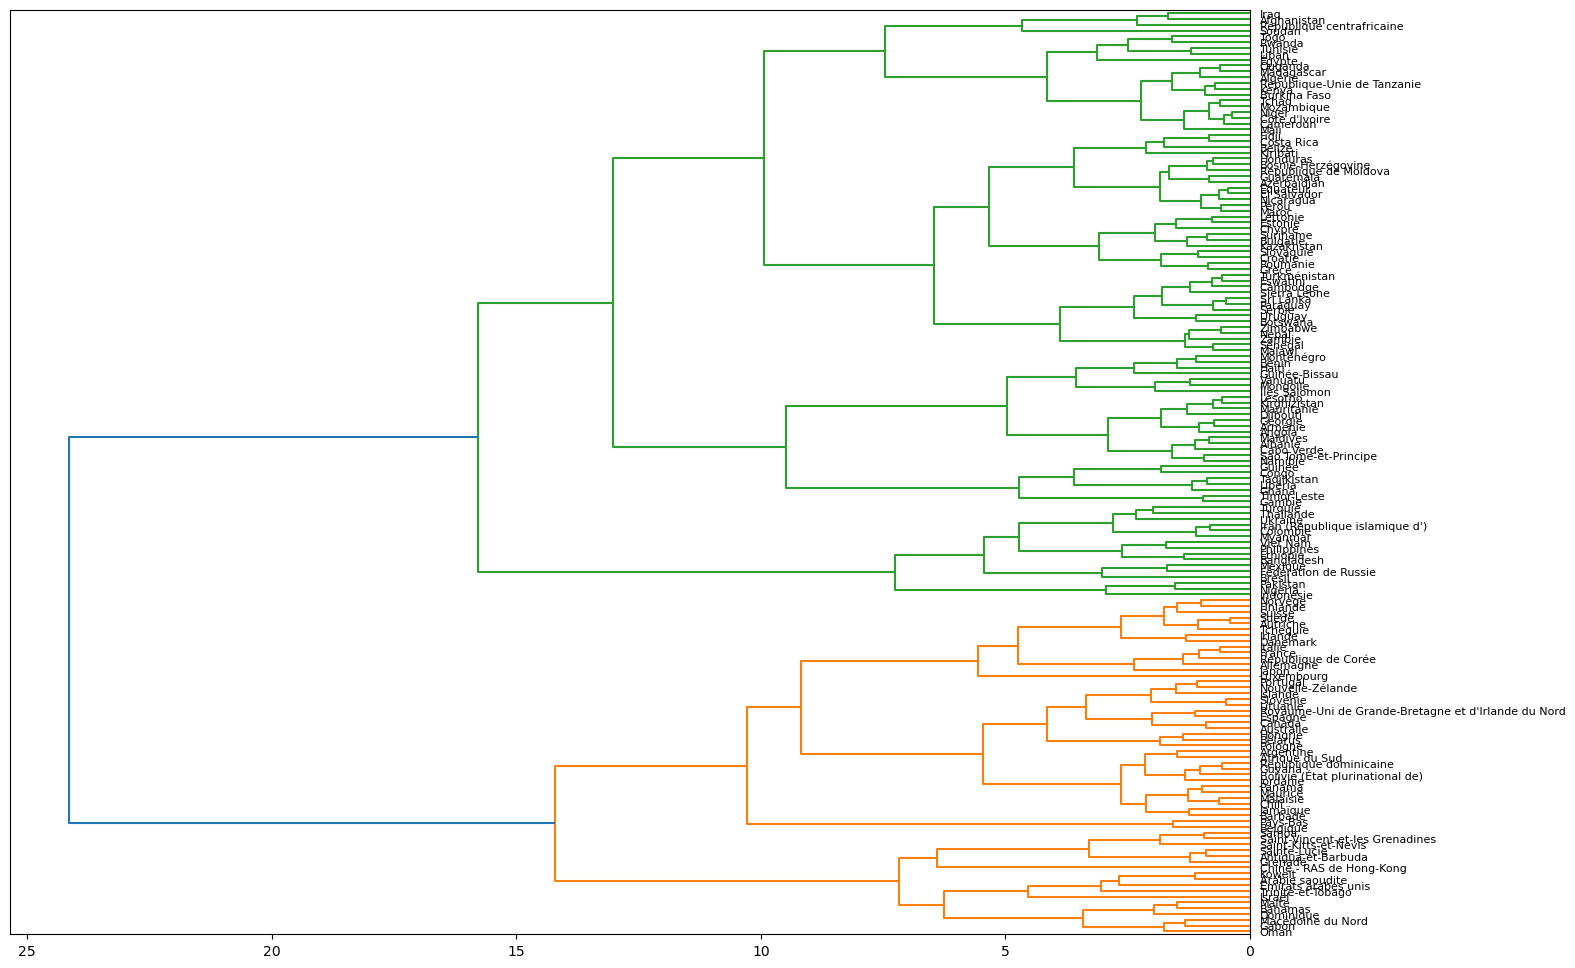

In [581]:
plt.figure(figsize=(16,12))
hierarchy.dendrogram(Z, leaf_font_size=8,labels=X.index,orientation='left')
plt.show()

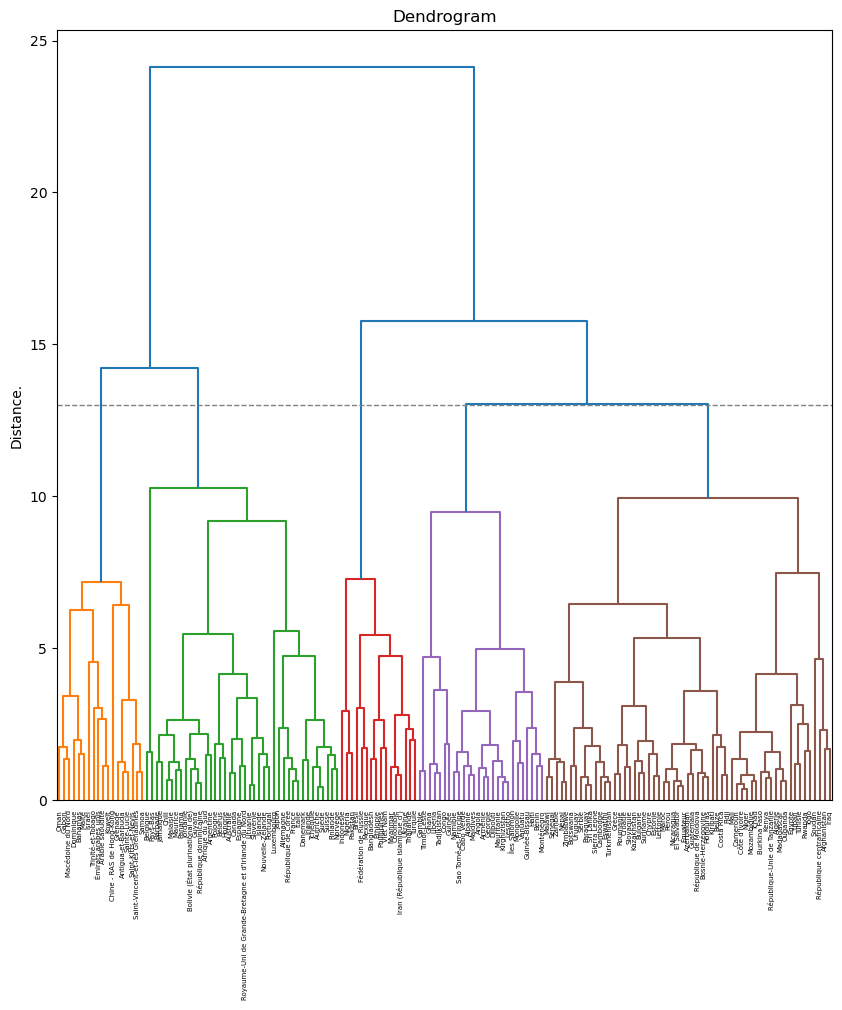

In [582]:
# Control number of clusters in the plot + add horizontal line.
plt.figure(figsize=(10,10))
hierarchy.dendrogram(Z, color_threshold=12,labels=X.index,leaf_rotation=90)
plt.axhline(y=13, c='grey', lw=1, linestyle='dashed')
plt.ylabel("Distance.")
plt.title('Dendrogram')
plt.show()

In [583]:
cah = AgglomerativeClustering(n_clusters=5, linkage="ward")

In [584]:
cah.fit(X)

AgglomerativeClustering(n_clusters=5)

In [585]:
cah.labels_

array([3, 3, 1, 3, 2, 3, 1, 3, 3, 1, 3, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 2, 4, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 3, 1,
       1, 1, 3, 1, 4, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1,
       1, 1, 3, 1, 1, 4, 1, 1, 3, 3, 1, 1, 1, 0, 1, 1, 3, 1, 3, 0, 1, 1,
       1, 2, 3, 1, 3, 1, 2, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 1, 1, 2, 1, 1,
       2, 1, 1, 2, 1], dtype=int64)

In [586]:
labels = cah.labels_

In [587]:
X['cluster_cah'] = labels
X.head()

C:\Users\micka\AppData\Local\Temp\ipykernel_14156\2522204953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster_cah'] = labels


,Croissance annuelle US$ (%),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),PIB par habitant ($),Indice Stabilité politique,Population,TDI (%),TAS (%),cluster_cah
Zone,,,,,,,,,
Afghanistan,12.593362,1.53,0.54,2096.1,-2.80,36296113.0,50.88,49.12,3
Afrique du Sud,10.667160,35.69,14.11,13950.5,-0.28,57009756.0,24.27,78.71,3
Albanie,10.705471,16.36,6.26,12771.0,0.38,2884169.0,80.85,27.66,1
Algérie,0.629575,6.38,1.97,11809.5,-0.92,41389189.0,0.72,99.28,3
Allemagne,7.456452,19.47,7.96,53071.5,0.59,82658409.0,48.42,87.06,2


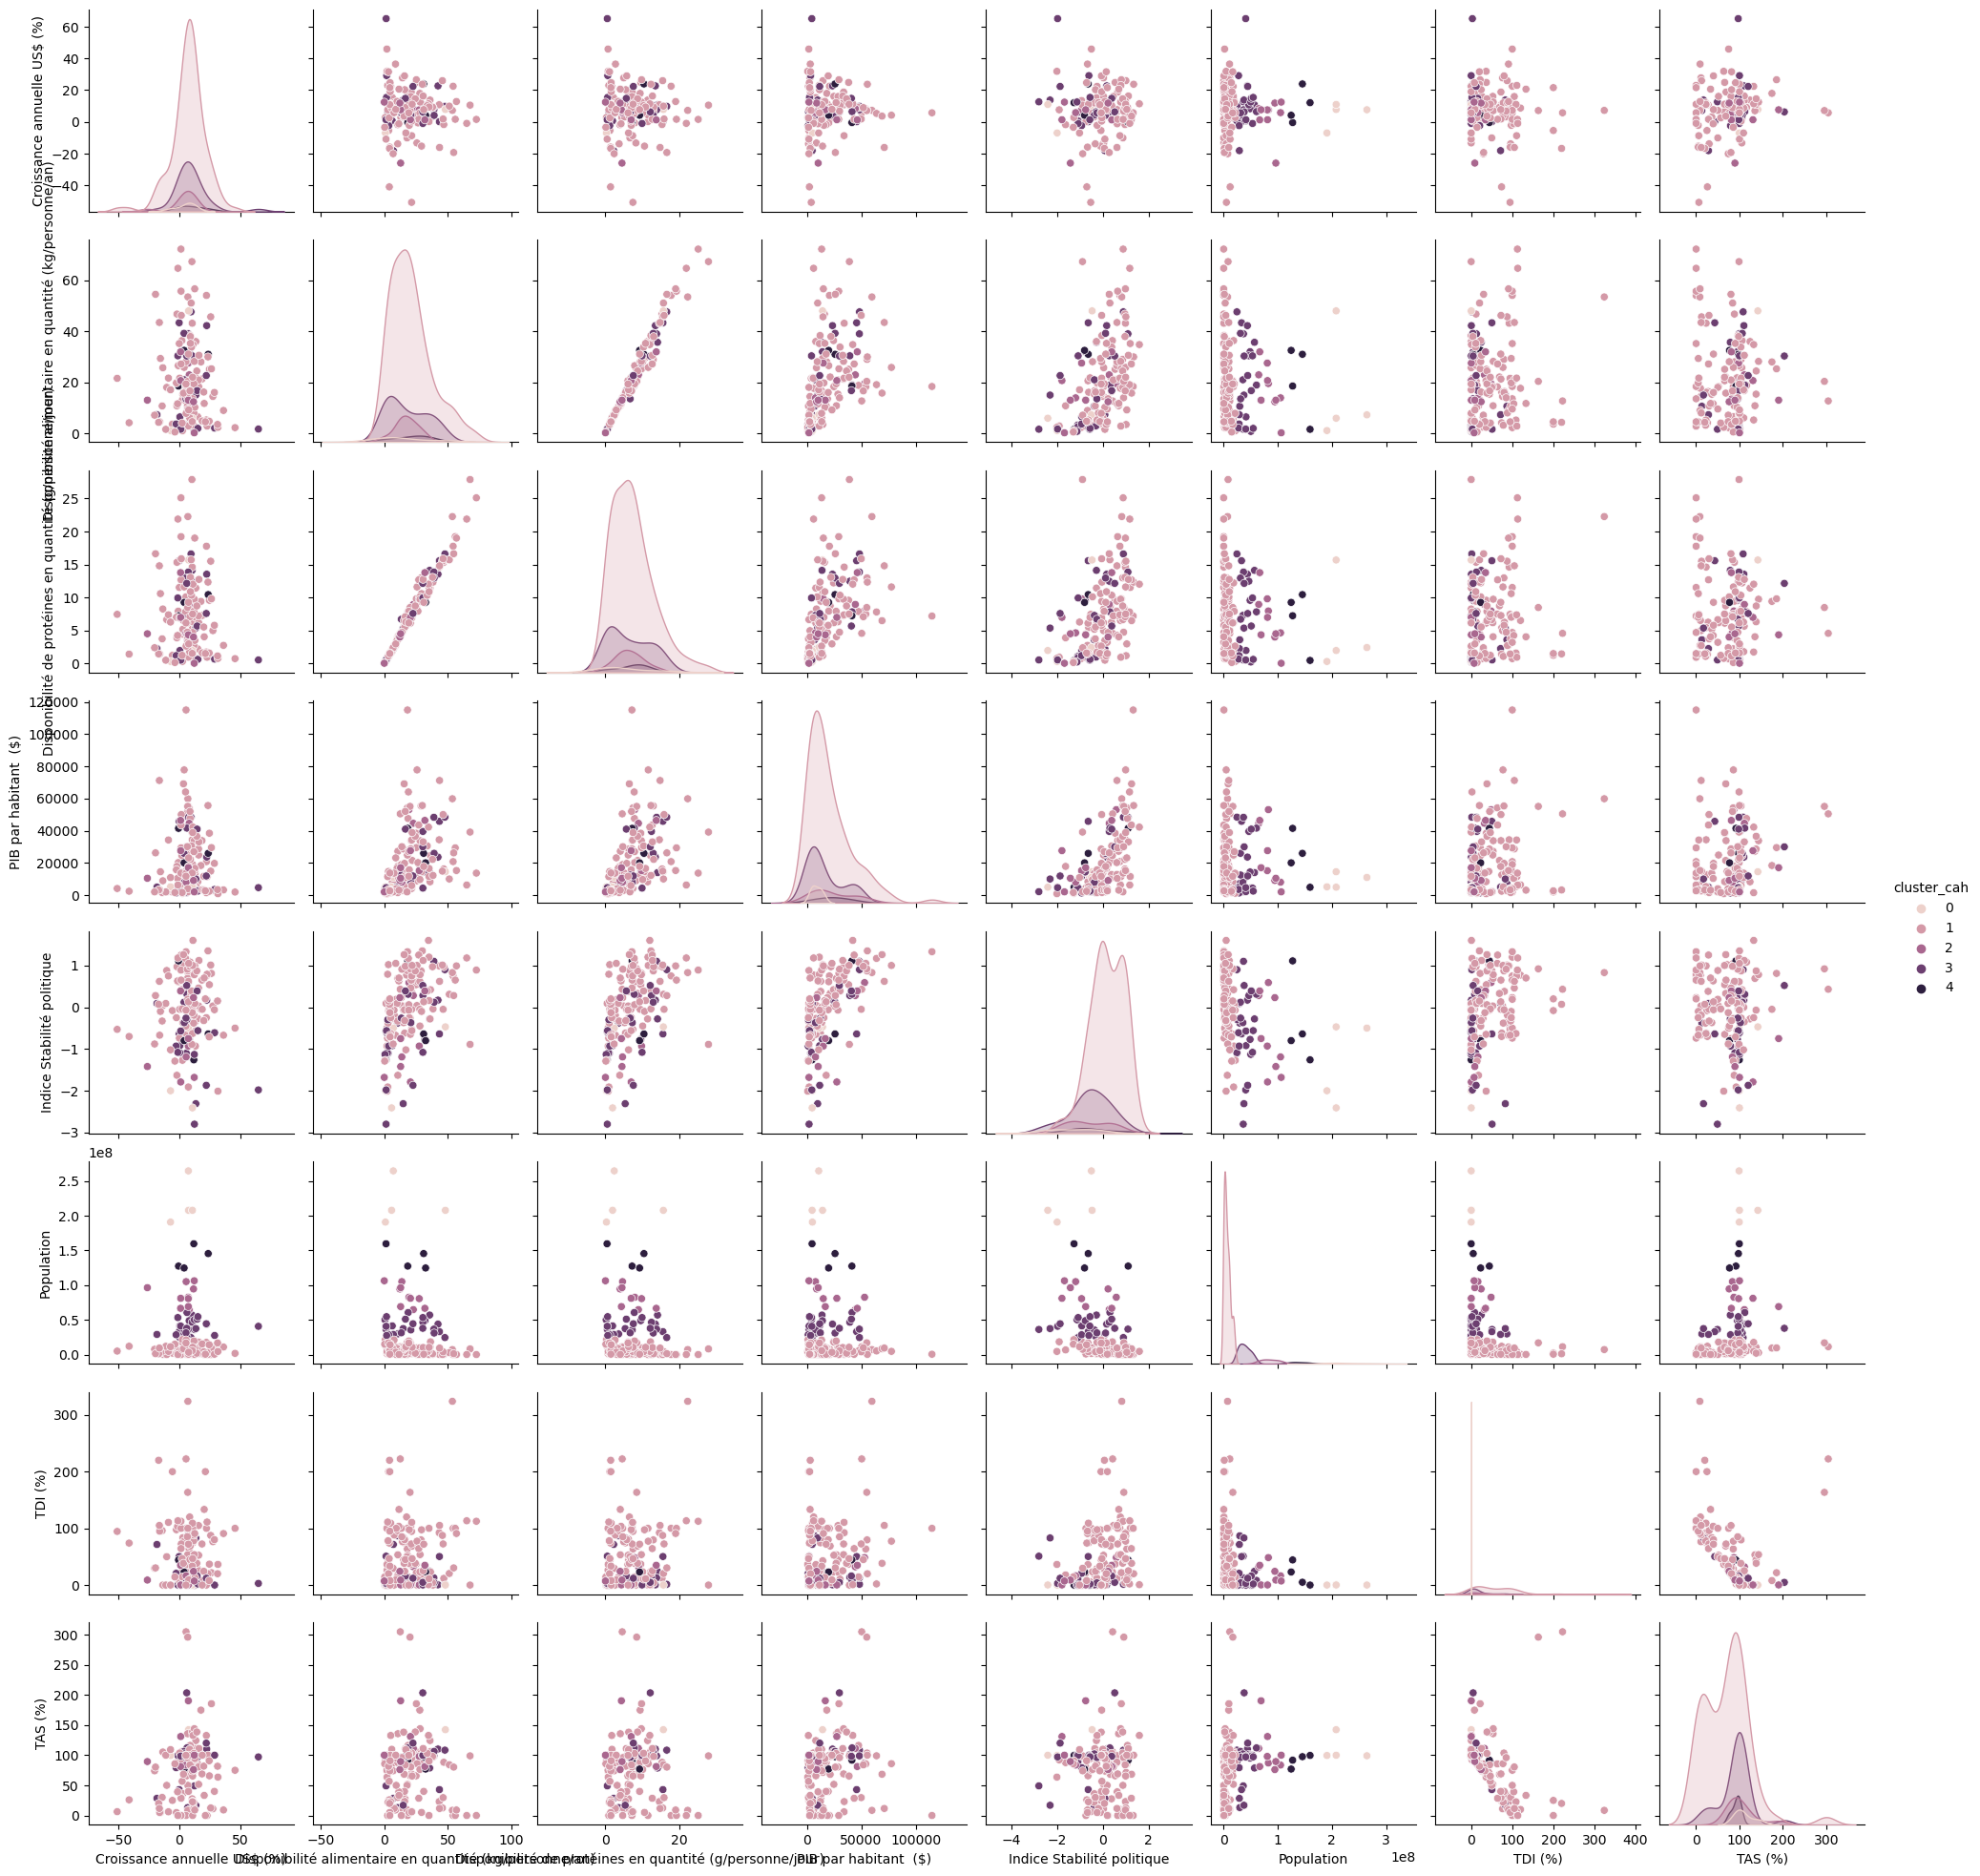

In [588]:
sns.pairplot(X, hue="cluster_cah")

In [589]:
clusters_stats = X.groupby('cluster_cah').mean()
clusters_stats

,Croissance annuelle US$ (%),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),PIB par habitant ($),Indice Stabilité politique,Population,TDI (%),TAS (%)
cluster_cah,,,,,,,,
0,4.812767,15.522500,5.095000,8857.875000,-1.345000,2.178161e+08,0.057500,110.185000
1,7.300341,20.911429,7.374107,20499.724107,0.183393,6.438260e+06,58.942679,70.619643
2,3.733940,17.471000,6.503000,23325.150000,-0.627000,8.478446e+07,17.258000,104.781000
3,9.714923,18.045517,6.422069,16317.534483,-0.554138,3.891515e+07,16.776207,91.012414
4,9.886465,20.875000,6.852500,23058.450000,-0.397500,1.393739e+08,18.067500,91.467500


In [590]:
X['cluster_cah'].value_counts()

1    112
3     29
2     10
4      4
0      4
Name: cluster_cah, dtype: int64

In [591]:
clusters = X['cluster_cah']

In [592]:
silhouette_avg = silhouette_score(X, clusters)
print('Score de silhouette :' ,silhouette_avg)

Score de silhouette : 0.7028396934106449


In [594]:
X.to_csv('C:/Users/micka/Desktop/Projet_9/csv_p9_clusters/df.csv')